# Python libraries: 

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Data :

In [2]:
df = pd.read_csv('F:\Data Science\Loyixalar\loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


# Data Analysis:

In [3]:
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [4]:
df.shape

(381, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [6]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [8]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             381 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         381 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      381 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   381 non-null    float64
 10  Credit_History     381 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [11]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = lb.fit_transform(df[col])
    

### Corellation Matrix:

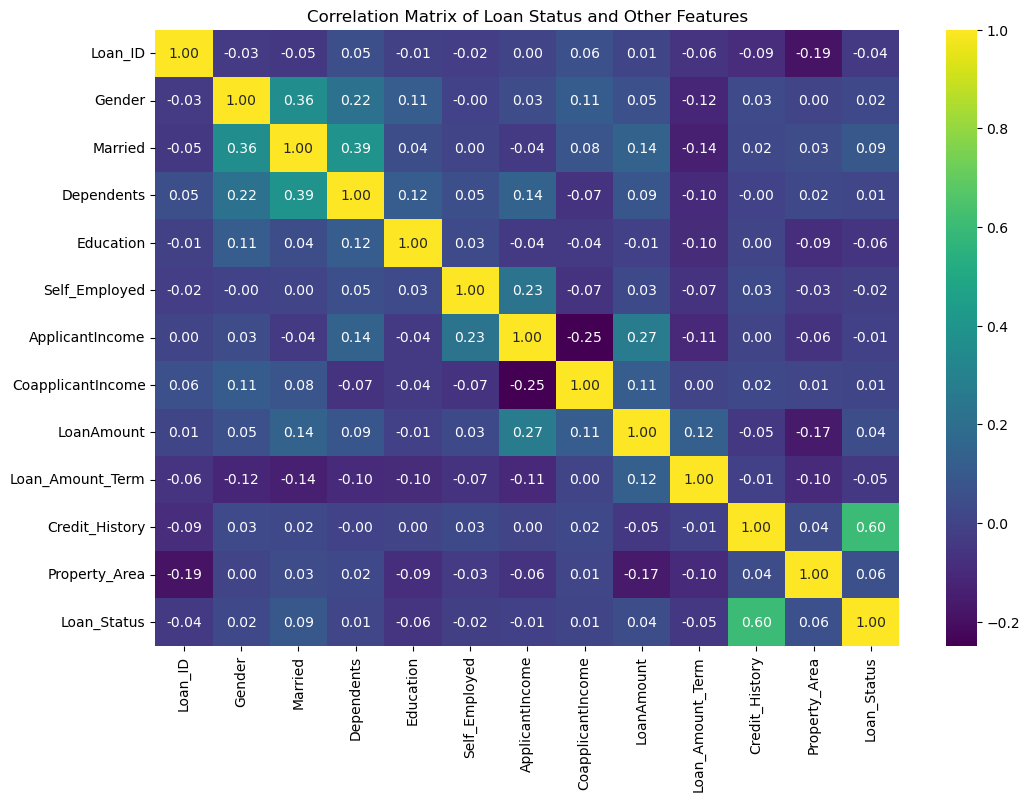

Loan_ID             -0.036862
Gender               0.020302
Married              0.092473
Dependents           0.013701
Education           -0.055586
Self_Employed       -0.017947
ApplicantIncome     -0.010167
CoapplicantIncome    0.009017
LoanAmount           0.041220
Loan_Amount_Term    -0.046807
Credit_History       0.601881
Property_Area        0.057834
Loan_Status          1.000000
dtype: float64


In [12]:
correlation_matrix = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap='viridis',fmt ='.2f')
plt.title('Correlation Matrix of Loan Status and Other Features')
plt.show()

correlation_matrix = df.corrwith(df['Loan_Status'])
print(correlation_matrix)

In [32]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [33]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

X_train,X_test,y_train,y_test  = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

# ML:

In [43]:
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

### accuracy:

In [44]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

print(f'Accuracy score: {accuracy}')
print('Classification report: ')
print(report)

Accuracy score: 0.8181818181818182
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.38      0.53        21
           1       0.81      0.98      0.89        56

    accuracy                           0.82        77
   macro avg       0.85      0.68      0.71        77
weighted avg       0.83      0.82      0.79        77



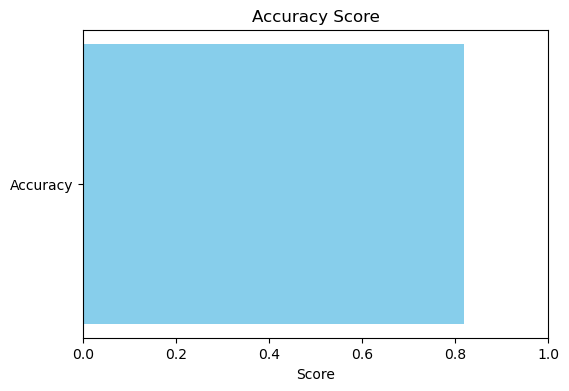

In [45]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.barh(['Accuracy'], [accuracy], color='skyblue')
ax.set_xlim(0, 1)
ax.set_xlabel('Score')
ax.set_title('Accuracy Score')
plt.show()

### Confusion Matrix:

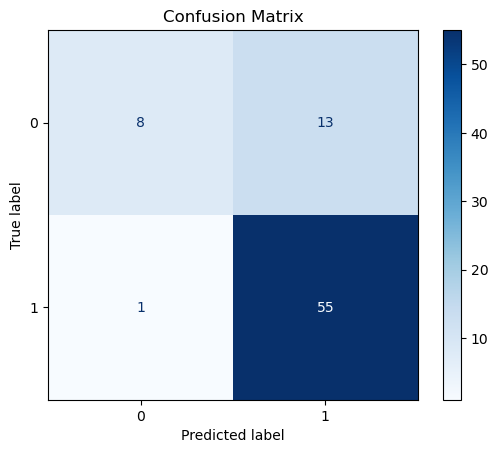

In [46]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ML (GradientBoosting):

Accuracy score: 0.8311688311688312
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.48      0.61        21
           1       0.83      0.96      0.89        56

    accuracy                           0.83        77
   macro avg       0.83      0.72      0.75        77
weighted avg       0.83      0.83      0.81        77



Text(0.5, 1.0, 'Classification Report')

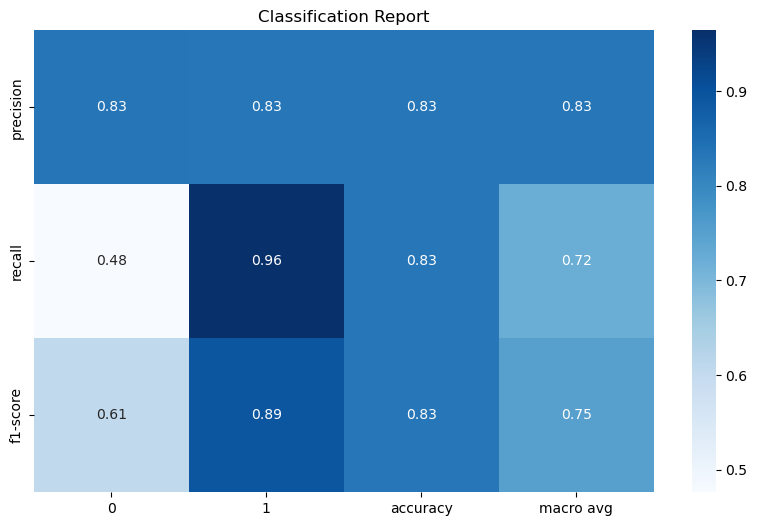

In [48]:
# Gradient Boosting modelini yaratish va o'qitish
model_g = GradientBoostingClassifier(random_state=42)
model_g.fit(X_train, y_train)

# Test to'plami uchun bashorat qilish
y_pred = model_g.predict(X_test)

# Natijalarni baholash
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f'Accuracy score: {accuracy}')
print('Classification report:')
print(classification_report(y_test, y_pred))


# Tasniflash hisobotini grafik yordamida
report_df = pd.DataFrame(report).transpose()

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1].T, annot=True, cmap='Blues', ax=ax)
ax.set_title('Classification Report')

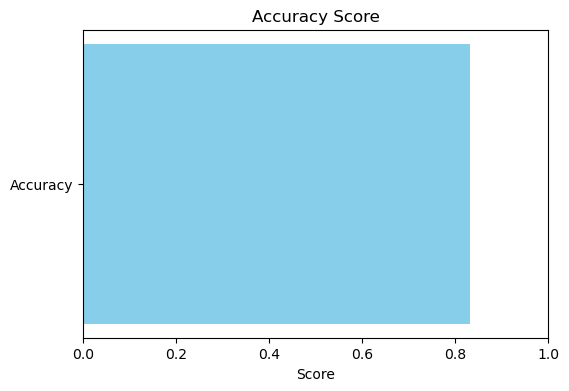

In [49]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.barh(['Accuracy'], [accuracy], color='skyblue')
ax.set_xlim(0, 1)
ax.set_xlabel('Score')
ax.set_title('Accuracy Score')
plt.show()
